In [ ]:
'''
Lung & Colon Cancer Image Classification - CNN Model

- Type: Lung
- Classes: 3 (benign, adenocarcinoma, squamous cell carcinoma)
- Num Epochs: 15
- Image Augmentation: rescale, zoom, shear, flip.
'''

In [1]:
import os
import random
import tensorflow as tf

In [2]:
TRAIN_PATH = "lungTrain-paper"
VALID_PATH = "lungValid-paper"
TEST_PATH = "lungTest-paper"

In [3]:
image_data = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True
    )

In [4]:
image_data1 = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
    )

In [5]:
img_size = 150
batch_size = 32

train = image_data.flow_from_directory(TRAIN_PATH, target_size=(img_size,img_size), 
                                       batch_size=batch_size, color_mode='rgb', shuffle = True)

val = image_data1.flow_from_directory(VALID_PATH, target_size=(img_size,img_size), 
                                     batch_size=batch_size, color_mode='rgb', shuffle = True)

Found 12000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


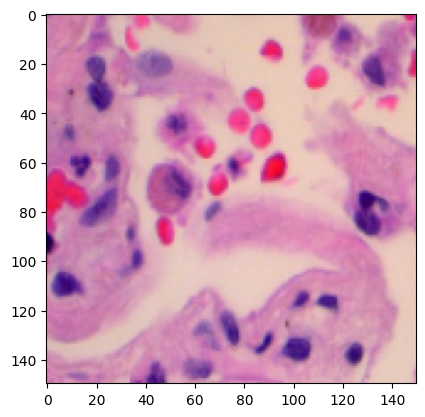

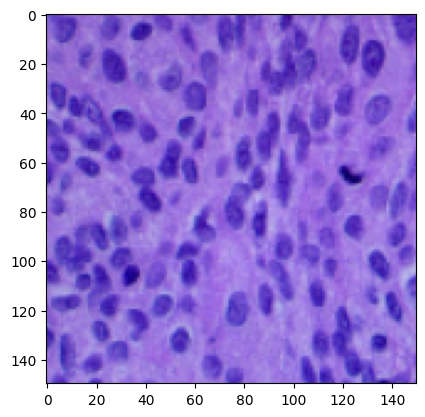

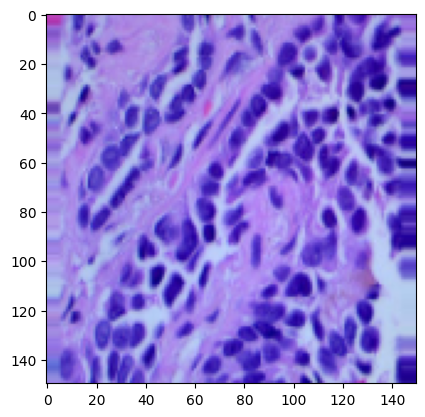

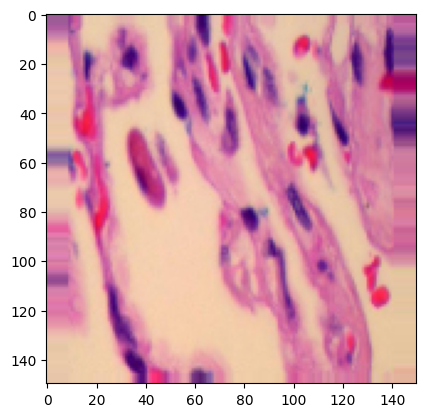

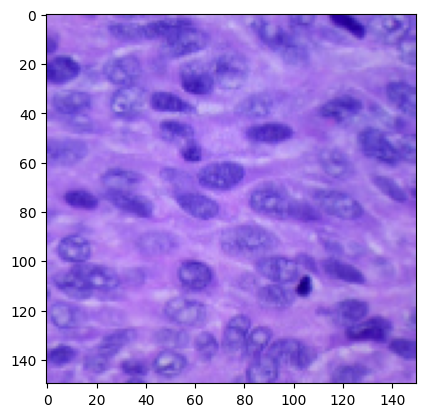

In [6]:
import matplotlib.pyplot as plt
for _ in range(5):
    img, label = train.next()
    plt.imshow(img[0])
    plt.show()

In [7]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(150, 150 ,3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(rate=0.4),
        tf.keras.layers.Dense(3)
    ])

In [8]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [9]:
history = model.fit(train, epochs=15, verbose = 1, validation_data=val)

Epoch 1/15
375/375 [==============================] - 211s 561ms/step - loss: 0.4896 - accuracy: 0.7770 - val_loss: 0.4277 - val_accuracy: 0.8213
Epoch 2/15
375/375 [==============================] - 204s 543ms/step - loss: 0.3511 - accuracy: 0.8537 - val_loss: 0.2869 - val_accuracy: 0.8800
Epoch 3/15
375/375 [==============================] - 204s 544ms/step - loss: 0.3081 - accuracy: 0.8737 - val_loss: 0.2657 - val_accuracy: 0.8840
Epoch 4/15
375/375 [==============================] - 206s 548ms/step - loss: 0.2730 - accuracy: 0.8894 - val_loss: 0.2412 - val_accuracy: 0.8913
Epoch 5/15
375/375 [==============================] - 210s 560ms/step - loss: 0.2480 - accuracy: 0.8997 - val_loss: 0.2150 - val_accuracy: 0.9253
Epoch 6/15
375/375 [==============================] - 206s 549ms/step - loss: 0.2300 - accuracy: 0.9071 - val_loss: 0.1959 - val_accuracy: 0.9253
Epoch 7/15
375/375 [==============================] - 208s 553ms/step - loss: 0.2140 - accuracy: 0.9143 - val_loss: 0.1717 -

In [10]:
test = image_data1.flow_from_directory(TEST_PATH, target_size=(img_size,img_size), 
                                     batch_size=1, color_mode='rgb', shuffle = True)

Found 1500 images belonging to 3 classes.


In [11]:
acc = model.evaluate(test)
print(f'The test set accuracy is {acc}\%.')

1500/1500 [==============================] - 19s 12ms/step - loss: 0.1219 - accuracy: 0.9540
The test set accuracy is [0.12191713601350784, 0.9539999961853027]\%.


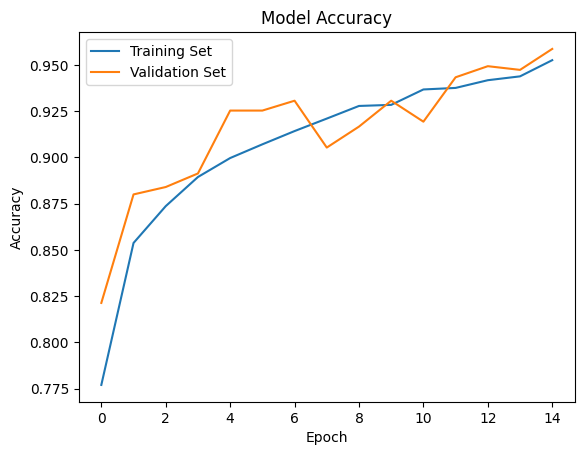

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as img

plt.title('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Set','Validation Set'], loc='upper left')

plt.show()

In [14]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d (None, 150, 150, 32)
2 conv2d_1 (None, 75, 75, 64)
4 conv2d_2 (None, 37, 37, 64)


In [15]:
model1 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)

In [27]:
img, label = test.next()
features = model1.predict(img)

print(features.shape)

1/1 [==============================] - 0s 34ms/step
(1, 150, 150, 32)


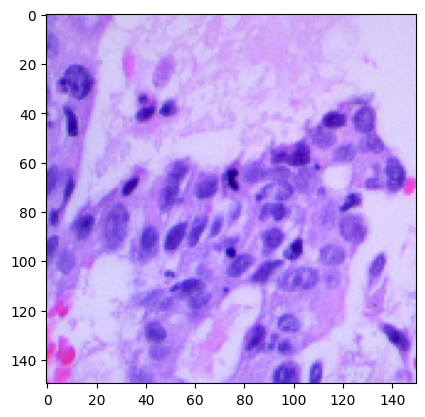

In [35]:
plt.imshow(img[0])
plt.show()

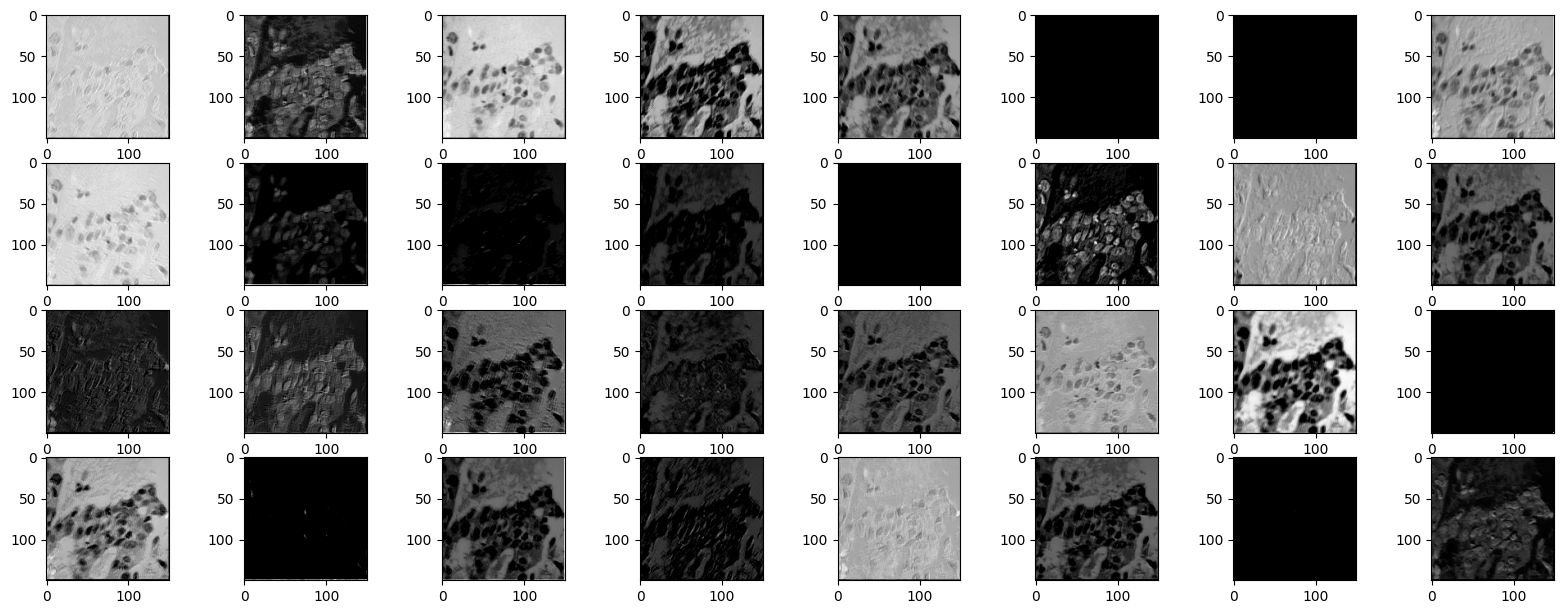

In [32]:
fig = plt.figure(figsize=(20,15))

for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1], cmap='gray')
    
plt.show()

1/1 [==============================] - 0s 58ms/step
(1, 75, 75, 64)


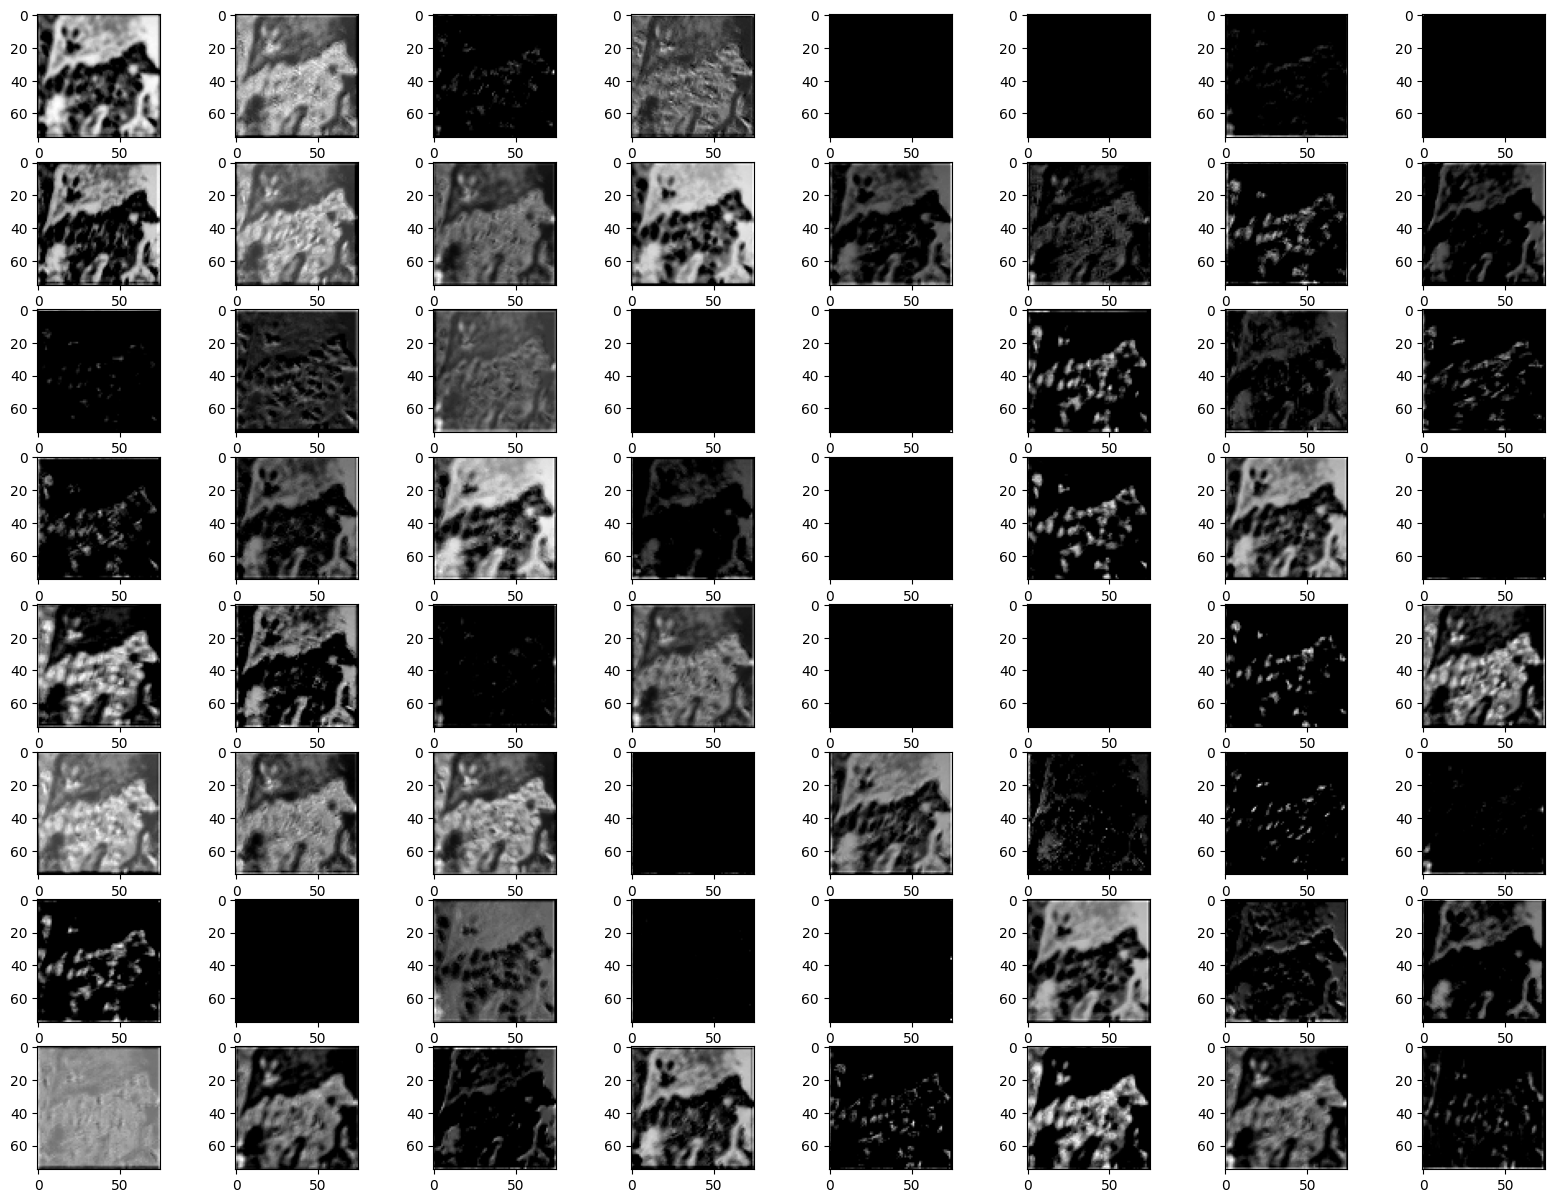

In [37]:
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[2].output) #2nd conv layer

features2 = model2.predict(img)
print(features2.shape)

fig = plt.figure(figsize=(20,15))

for i in range(1,features2.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features2[0,:,:,i-1], cmap='gray')
    
plt.show()

1/1 [==============================] - 0s 54ms/step
(1, 37, 37, 64)


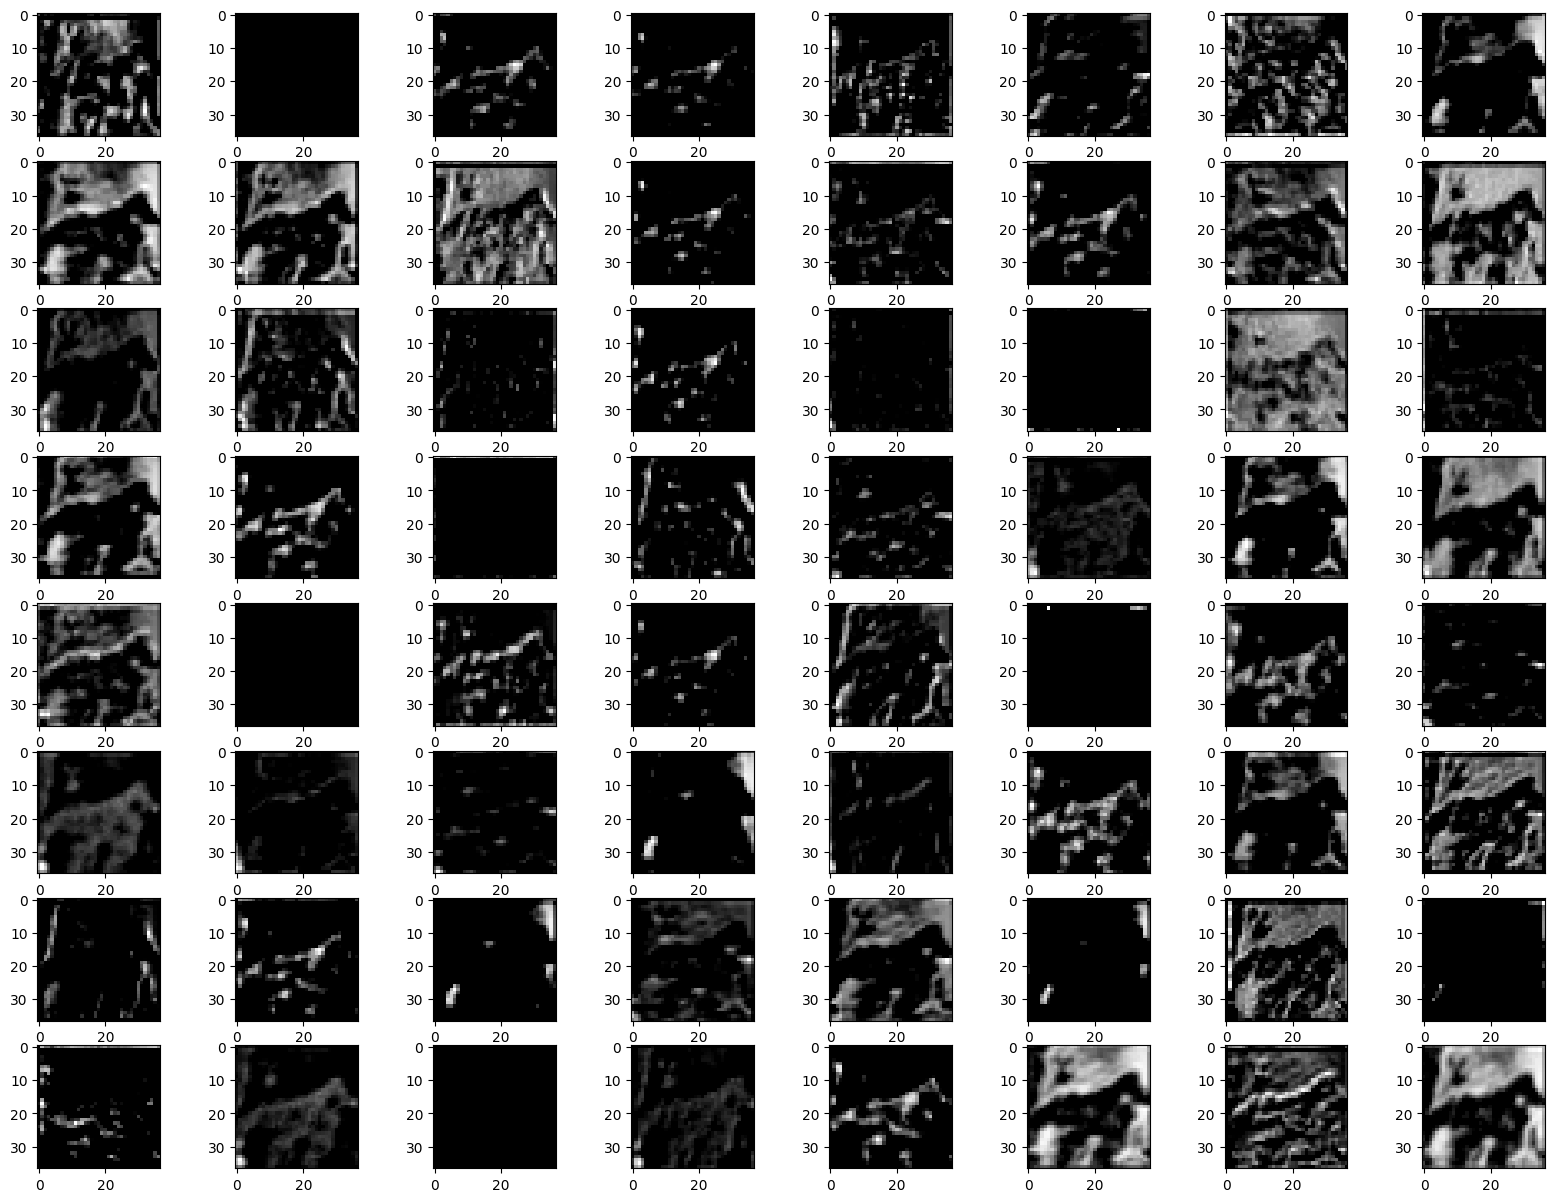

In [30]:
model3 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[4].output) #2nd conv layer

features3 = model3.predict(img)
print(features3.shape)

fig = plt.figure(figsize=(20,15))

for i in range(1,features3.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features3[0,:,:,i-1], cmap='gray')
    
plt.show()

In [23]:
test_labels = []

for i in range(0,1500):
    pred = test[i][1][0]
    if pred[0] == 1.0:
        test_labels.append(0)
    elif pred[1] == 1.0:
        test_labels.append(1)
    else:
        test_labels.append(2)

In [24]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# num_classes = 3
predict_test = model.predict(test).argmax(axis=1)
cm = confusion_matrix(test_labels, predict_test)

1500/1500 [==============================] - 18s 12ms/step


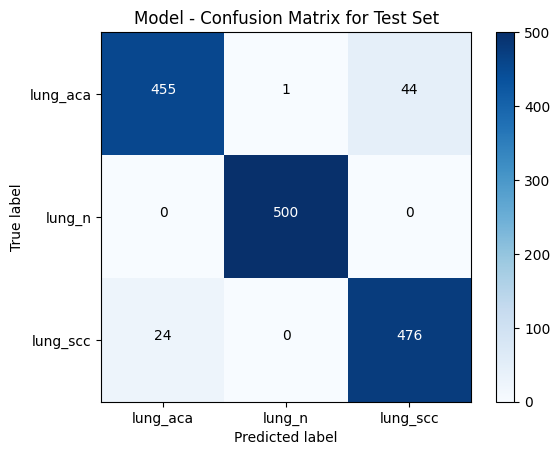

In [26]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Model - Confusion Matrix for Test Set")
plt.colorbar()
tick_marks = np.arange(3)

classes = ['lung_aca', 'lung_n', 'lung_scc']
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

threshold = cm.max() / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()